## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.410694  1.712387  0.561800 -0.356836 -0.236938  0.388080
1 -0.339476  0.571686  0.683039  0.440458 -0.794144  0.315836
2  1.421780 -0.905256 -1.370093  1.310721  1.338481  1.682754
3 -0.049275 -1.441745  1.209884 -0.617522 -0.893133 -1.422486
4  0.738058 -0.105412  0.341809  1.018156 -1.003951  0.759042


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9771540	total: 46.7ms	remaining: 46.7s
1:	learn: 0.9668124	total: 47.1ms	remaining: 23.5s
2:	learn: 0.9567937	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9464540	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9368039	total: 48.2ms	remaining: 9.59s
5:	learn: 0.9265015	total: 48.6ms	remaining: 8.05s
6:	learn: 0.9168335	total: 49ms	remaining: 6.95s
7:	learn: 0.9072592	total: 49.4ms	remaining: 6.12s
8:	learn: 0.8983685	total: 49.7ms	remaining: 5.48s
9:	learn: 0.8891425	total: 50.1ms	remaining: 4.96s
10:	learn: 0.8801546	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8694235	total: 50.9ms	remaining: 4.19s
12:	learn: 0.8601424	total: 51.2ms	remaining: 3.89s
13:	learn: 0.8524259	total: 51.6ms	remaining: 3.63s
14:	learn: 0.8428060	total: 51.9ms	remaining: 3.41s
15:	learn: 0.8344367	total: 52.3ms	remaining: 3.21s
16:	learn: 0.8262936	total: 52.6ms	remaining: 3.04s
17:	learn: 0.8176550	total: 53ms	remaining: 2.89s
18:	learn: 0.8100092	total: 53.4ms	remaining: 2.

188:	learn: 0.2110587	total: 118ms	remaining: 507ms
189:	learn: 0.2096113	total: 119ms	remaining: 506ms
190:	learn: 0.2083038	total: 119ms	remaining: 504ms
191:	learn: 0.2069210	total: 119ms	remaining: 503ms
192:	learn: 0.2054588	total: 120ms	remaining: 501ms
193:	learn: 0.2042360	total: 120ms	remaining: 499ms
194:	learn: 0.2027067	total: 120ms	remaining: 497ms
195:	learn: 0.2013000	total: 121ms	remaining: 496ms
196:	learn: 0.1998088	total: 121ms	remaining: 494ms
197:	learn: 0.1983078	total: 122ms	remaining: 492ms
198:	learn: 0.1971253	total: 122ms	remaining: 491ms
199:	learn: 0.1957570	total: 122ms	remaining: 489ms
200:	learn: 0.1946246	total: 123ms	remaining: 487ms
201:	learn: 0.1931100	total: 123ms	remaining: 486ms
202:	learn: 0.1919877	total: 123ms	remaining: 484ms
203:	learn: 0.1909524	total: 124ms	remaining: 482ms
204:	learn: 0.1896111	total: 124ms	remaining: 480ms
205:	learn: 0.1891659	total: 124ms	remaining: 478ms
206:	learn: 0.1878125	total: 124ms	remaining: 477ms
207:	learn: 

478:	learn: 0.0456089	total: 222ms	remaining: 241ms
479:	learn: 0.0453048	total: 222ms	remaining: 240ms
480:	learn: 0.0450068	total: 222ms	remaining: 240ms
481:	learn: 0.0448884	total: 223ms	remaining: 239ms
482:	learn: 0.0446440	total: 223ms	remaining: 239ms
483:	learn: 0.0443540	total: 223ms	remaining: 238ms
484:	learn: 0.0442404	total: 224ms	remaining: 238ms
485:	learn: 0.0440220	total: 224ms	remaining: 237ms
486:	learn: 0.0437625	total: 225ms	remaining: 237ms
487:	learn: 0.0434685	total: 225ms	remaining: 236ms
488:	learn: 0.0433947	total: 225ms	remaining: 235ms
489:	learn: 0.0433225	total: 226ms	remaining: 235ms
490:	learn: 0.0431045	total: 226ms	remaining: 234ms
491:	learn: 0.0430604	total: 226ms	remaining: 234ms
492:	learn: 0.0427682	total: 227ms	remaining: 233ms
493:	learn: 0.0426985	total: 227ms	remaining: 233ms
494:	learn: 0.0426558	total: 228ms	remaining: 232ms
495:	learn: 0.0425880	total: 228ms	remaining: 232ms
496:	learn: 0.0423768	total: 228ms	remaining: 231ms
497:	learn: 

765:	learn: 0.0128686	total: 323ms	remaining: 98.8ms
766:	learn: 0.0128179	total: 324ms	remaining: 98.4ms
767:	learn: 0.0127628	total: 324ms	remaining: 98ms
768:	learn: 0.0127185	total: 325ms	remaining: 97.5ms
769:	learn: 0.0126564	total: 325ms	remaining: 97.1ms
770:	learn: 0.0126027	total: 325ms	remaining: 96.7ms
771:	learn: 0.0125679	total: 326ms	remaining: 96.2ms
772:	learn: 0.0125076	total: 326ms	remaining: 95.8ms
773:	learn: 0.0124597	total: 327ms	remaining: 95.3ms
774:	learn: 0.0124009	total: 327ms	remaining: 94.9ms
775:	learn: 0.0123585	total: 327ms	remaining: 94.5ms
776:	learn: 0.0123276	total: 328ms	remaining: 94ms
777:	learn: 0.0122919	total: 328ms	remaining: 93.6ms
778:	learn: 0.0122510	total: 328ms	remaining: 93.1ms
779:	learn: 0.0122207	total: 329ms	remaining: 92.7ms
780:	learn: 0.0121856	total: 329ms	remaining: 92.3ms
781:	learn: 0.0121175	total: 329ms	remaining: 91.8ms
782:	learn: 0.0120414	total: 330ms	remaining: 91.4ms
783:	learn: 0.0119979	total: 330ms	remaining: 90.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

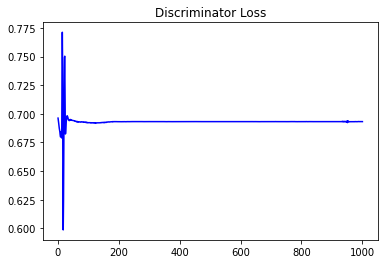

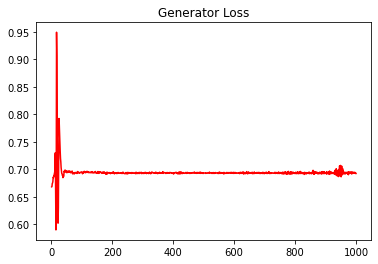

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.243724993449824


#### Sanity Checks 

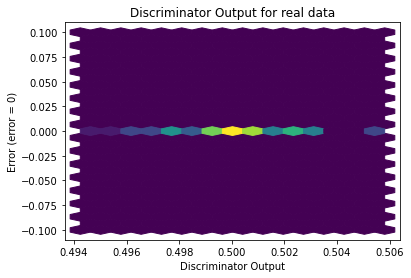

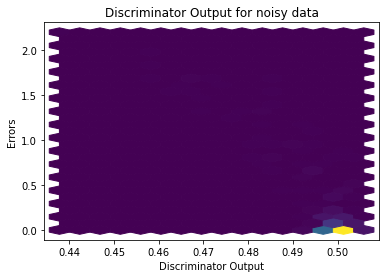

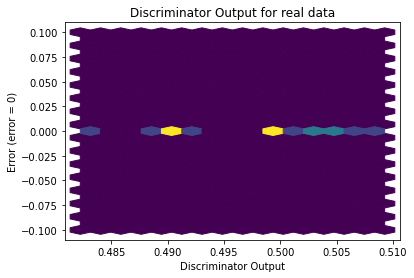

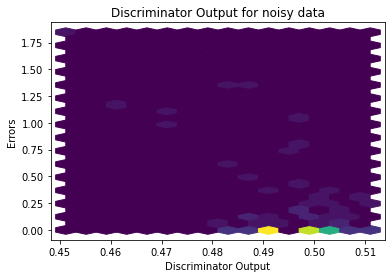

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


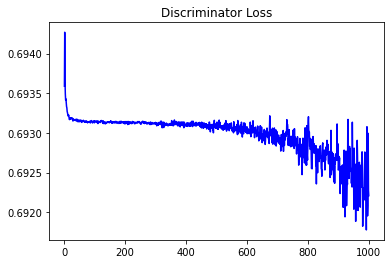

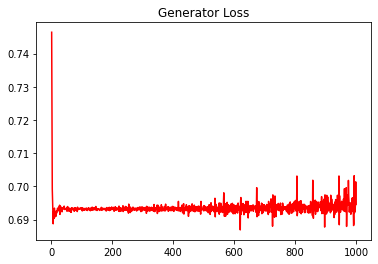

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2851733697153387


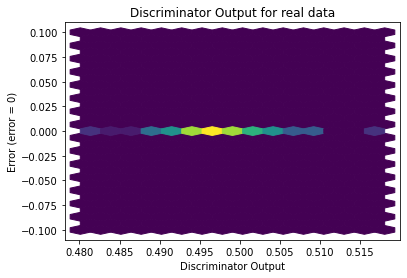

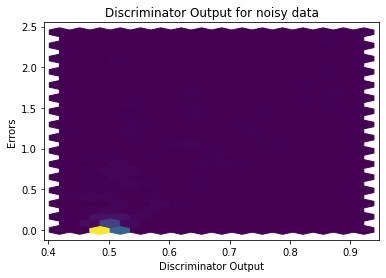

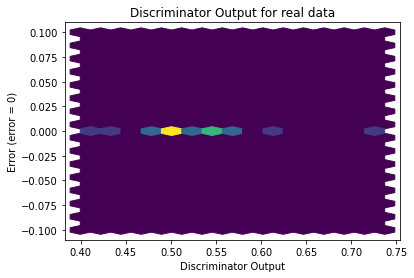

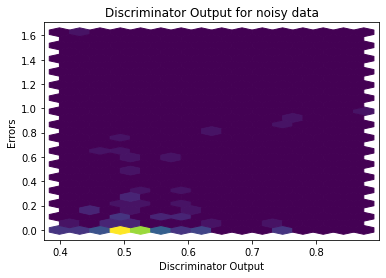

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
